In [16]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import scipy.linalg as lalg

In [17]:
def laplacian1d(nPoints):
    H = np.zeros((nPoints,nPoints))
    H[np.diag_indices(nPoints)]=-2
    uppDiag = (np.arange(nPoints-1), np.arange(1,nPoints))
    lowDiag = (np.arange(1,nPoints), np.arange(0,nPoints-1))
    H[uppDiag]=1
    H[lowDiag]=1
    return H
def lapacian1dTrDiag(nPoints):
    return -2*np.ones(nPoints), np.ones(nPoints-1)

In [31]:
def randomGaussianPotential(xmin, xmax,nPoints,sigma):
    hD, hOD = lapacian1dTrDiag(1000)
    x = np.linspace(xmin, xmax, nPoints)
    eps = (xmax-xmin)/nPoints
    hD =-hD/(2*eps**2)
    hOD=-hOD/(2*eps**2)
    hD = hD + np.random.randn(nPoints)*sigma
    w, v = lalg.eigh_tridiagonal(hD, hOD,select='i', select_range=(0,0))
    return w,v

In [57]:
nSamples = 1000
energies = []
stds = []
sigmas = np.linspace(0,100)
for sigma in sigmas:
    Es = np.zeros(nSamples)
    for sample in np.arange(nSamples):
        E, psi = randomGaussianPotential(0,1,1000,sigma)
        Es[sample] = E
    energies.append(np.mean(Es))
    stds.append(np.std(Es))

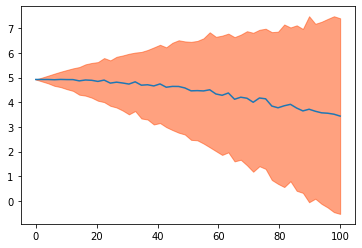

In [65]:
energies = np.array(energies)
stds = np.array(stds)
plt.plot(sigmas,energies)
plt.fill_between(sigmas, energies-stds, energies+stds, color='orangered', alpha=0.5)